In [3]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile
from pydub import AudioSegment
import os

In [4]:
def time_range_to_file(inpath: str, outpath: str, start: float, duration: float, extra_sec=0.2):
    wav = AudioSegment.from_wav(inpath)

    end = start + duration + extra_sec
    start -= extra_sec
    if start < 0:
        start = 0.

    start *= 1000  # milliseconds
    end *= 1000  # milliseconds

    seg = wav[start:end]
    seg.export(outpath, format="wav", parameters=["-acodec", "pcm_s16le", "-ac", "1", "-ar", "16000"])

In [5]:
file = '/NASdata/AudioData/mandarin/AISHELL-2/iOS/data/wav/C0731/IC0731W0400.wav'

time_range_to_file(file, 'tmp.wav', 1.95, 0.15)

In [22]:
def specshow(audio_path, fmin=50, fmax=350):
    sr, y = scipy.io.wavfile.read(audio_path)
    if y.dtype is not np.float:
        y = y.astype('float32') / 32767
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, n_fft=2048, hop_length=16, fmin=fmin, fmax=fmax)

    plt.figure(figsize=(2.25, 2.25))

    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, fmin=fmin, fmax=fmax, cmap='magma')

    plt.gca().xaxis.set_major_locator(plt.NullLocator()) 
    plt.gca().yaxis.set_major_locator(plt.NullLocator()) 
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0) 
    plt.margins(0, 0)
    plt.show()

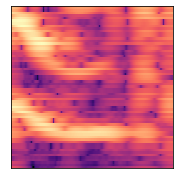

In [23]:
specshow('tmp.wav')